In [3]:
import pandas as pd
import numpy as np


In [4]:
!pip install pandas numpy openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   --------- ----------------------------- 61.4/250.9 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.9 kB 798.9 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import statistics
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load data from Excel file
file = r'C:\Users\popur\Downloads\Lab Session Data.xlsx'
data = pd.read_excel(file, sheet_name='Purchase data')

print("Original DataFrame: ")
print(data.head())

# Select necessary columns
filtered_data = data[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]

print("\nFiltered DataFrame: ")
print(filtered_data.head())

# Get column names
print("\nColumn names: ")
print(filtered_data.columns.values.tolist())

# Separate product quantities into X
X = filtered_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]

# Store payment amounts into y
y = filtered_data[['Payment (Rs)']]

print("\nMatrix X: ")
print(X)
print("\nMatrix y: ")
print(y)

# Function to get the number of columns (dimensionality)
def get_dimensionality(X):
    return X.shape[1]

# Function to get the number of rows (observations)
def get_num_rows(X):
    return X.shape[0]

# Function to compute the rank of a matrix
def get_rank(X):
    return np.linalg.matrix_rank(X)

# Function to compute the pseudo-inverse of a matrix
def get_pseudo_inverse(X):
    return np.linalg.pinv(X)

# Function to estimate product costs using pseudo-inverse
def estimate_costs(X, y):
    X_pseudo = get_pseudo_inverse(X)
    return X_pseudo @ y

print("\nEstimated product costs:\n", estimate_costs(X, y))

# Function to label customers as RICH or POOR based on payment
def label_customers(y):
    return np.where(y > 200, 'RICH', 'POOR').flatten()

# Function to build and evaluate a logistic regression model
def classify_customers():
    labels = label_customers(y)
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    print("\nClassification Report:\n")
    print(classification_report(y_test, predictions, zero_division=0))
    
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, predictions))

def main():
    # Basic Data Analysis
    print(f"\nDimensionality of X: {get_dimensionality(X)}")
    print(f"\nNumber of rows in X: {get_num_rows(X)}")
    print(f"\nRank of Matrix X: {get_rank(X)}")
    
    # Product Cost Estimation
    print("\nPseudo-Inverse of X:")
    print(get_pseudo_inverse(X))
    
    # Customer Classification
    classify_customers()

if __name__ == "__main__":
    main()

Original DataFrame: 
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN         

Data Preview:
           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  

Mean Price =  1560.6634538152612
Variance of Price =  58732.36535253918

Wednesdays Data:
            Date Month  Day    Price     Open     High      Low   Volume  \
4   Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
9   Jun 16, 2021   Jun  Wed  2089.95  2109.45  2121.95  2075.30  856.94K   
14  Jun 09, 2021   Jun  Wed  2071.20  2160.00  2163.00  2060.00    2.34M   
19  Jun 02, 2021   Jun  Wed  1917.95  1899.95  1927.50  1895.25  576

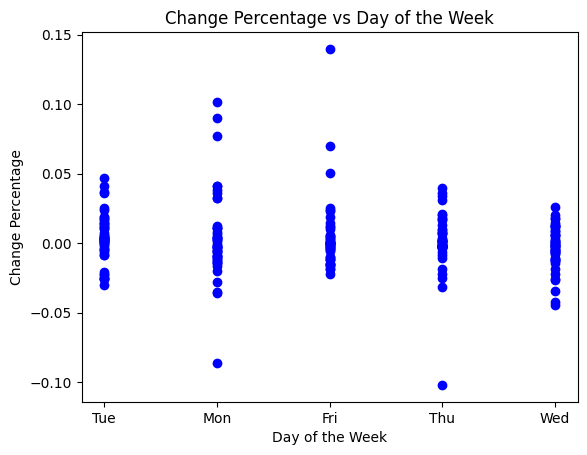

In [5]:
# Load data from the Excel file
file_path = r'C:\Users\popur\Downloads\Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Display the first few rows of the dataframe
print("Data Preview:")
print(data.head())

# Calculate mean and variance of the 'Price' column
mean_price = data['Price'].mean()
variance_price = data['Price'].var()
print('\nMean Price = ', mean_price)
print('Variance of Price = ', variance_price)
print()

# Select data for Wednesdays and calculate the sample mean
wednesdays = data[data['Day'] == 'Wed']
print("Wednesdays Data:")
print(wednesdays.head())
print()

mean_wednesday = wednesdays['Price'].mean()
print('Mean Price on Wednesdays = ', mean_wednesday)
print('Overall Mean Price = ', mean_price)

# Compare Wednesday's mean price with the overall mean
if mean_wednesday > mean_price:
    print("Observation: Wednesday's mean price is higher than the overall mean.")
elif mean_wednesday < mean_price:
    print("Observation: Wednesday's mean price is lower than the overall mean.")
else:
    print("Observation: Wednesday's mean price is equal to the overall mean.")
print()

# Select data for April and calculate the sample mean
april_data = data[data['Month'] == 'Apr']
print("April Data:")
print(april_data.head())
print()

mean_april = april_data['Price'].mean()
print('Mean Price in April = ', mean_april)
print('Overall Mean Price = ', mean_price)

# Compare April's mean price with the overall mean
if mean_april > mean_price:
    print("Observation: April's mean price is higher than the overall mean.")
elif mean_april < mean_price:
    print("Observation: April's mean price is lower than the overall mean.")
else:
    print("Observation: April's mean price is equal to the overall mean.")
print()

# Calculate the probability of making a loss
loss_days = data['Chg%'].apply(lambda x: x < 0)
prob_loss = loss_days.mean()
print(f"Probability of making a loss: {prob_loss:.2f}")
print()

# Alternative method to calculate the probability of making a loss
negative_changes = data[data['Chg%'] < 0]
total_days = len(data)
loss_days_count = len(negative_changes)
prob_loss_alt = loss_days_count / total_days

print(f"\nProbability of making a loss (alternative method): {prob_loss_alt:.2f}")
print()

# Calculate the probability of making a profit on Wednesdays
wednesday_profits = (wednesdays['Chg%'] > 0).sum() / len(wednesdays)
print(f"\nProbability of making a profit on Wednesday: {wednesday_profits:.2f}")
print()

# Calculate the conditional probability of making a profit on Wednesday
total_profit_prob = len(data[data['Chg%'] > 0]) / len(data)
conditional_profit_prob = wednesday_profits / total_profit_prob
print(f"Conditional probability of making a profit given it's Wednesday: {conditional_profit_prob:.2f}")
print()

# Scatter plot of 'Chg%' against the 'Day' of the week
plt.scatter(data['Day'], data['Chg%'], color='blue')
plt.title('Change Percentage vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Change Percentage')
plt.show()

In [6]:
# Load the data from the Excel file
file = r'C:\Users\popur\Downloads\Lab Session Data.xlsx'
data = pd.read_excel(file, sheet_name='thyroid0387_UCI')

# Display the first few rows of the dataframe
print("Preview of the Data:")
print(data.head())

Preview of the Data:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   objec

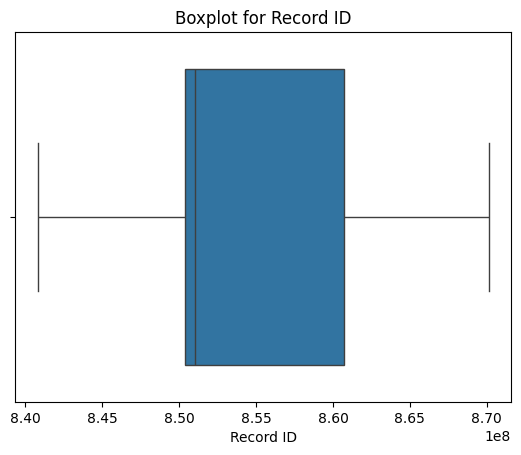

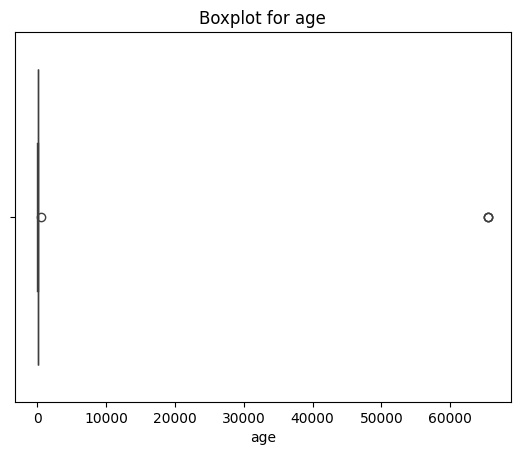


Mean and Variance for Numeric Variables:
         Record ID           age
mean  8.529473e+08  7.355582e+01
var   5.748625e+13  1.401801e+06


In [7]:
# Load the data from the Excel file
file =r'C:\Users\popur\Downloads\Lab Session Data.xlsx'
data = pd.read_excel(file, sheet_name='thyroid0387_UCI')

# Display general information about the dataframe
print("Data Overview:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe(include='all'))

# Display the data types of each attribute
data_types = data.dtypes
print("\nData Types:")
print(data_types)

# Check for missing values in each attribute
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Study data range for numeric variables
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_summary = data[numeric_cols].describe()
print("\nNumeric Data Summary:")
print(numeric_summary)

# Visualize outliers in numeric variables using boxplots
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Calculate the mean and variance for numeric variables
mean_variance = data[numeric_cols].agg(['mean', 'var'])
print("\nMean and Variance for Numeric Variables:")
print(mean_variance)

In [9]:
# Load the data from the Excel file
file = r'C:\Users\popur\Downloads\Lab Session Data.xlsx'
data = pd.read_excel(file, sheet_name='thyroid0387_UCI')

# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Handle missing values in numeric columns
for column in numeric_columns:
    if not data[column].isnull().any():
        continue  # Skip columns with no missing values

    if data[column].isna().sum() > 0:
        # Check for outliers
        mean = data[column].mean()
        std_dev = data[column].std()
        if any(data[column] > mean + 3 * std_dev) or any(data[column] < mean - 3 * std_dev):
            # Use median for attributes with outliers
            data[column].fillna(data[column].median(), inplace=True)
        else:
            # Use mean for attributes without outliers
            data[column].fillna(data[column].mean(), inplace=True)

# Handle missing values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check for any remaining missing values
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

C:\Users\popur\AppData\Local\Temp\ipykernel_2372\2024002258.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [11]:
# Load the data from the Excel file
file = r'C:\Users\popur\Downloads\Lab Session Data.xlsx'
df = pd.read_excel(file, sheet_name='thyroid0387_UCI')

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Example normalization for numeric columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the DataFrame after normalization
print("Normalized Data:")
print(df.head())

Normalized Data:
   Record ID       age sex on thyroxine query on thyroxine  \
0  -1.602090 -0.037634   F            f                  f   
1  -1.602090 -0.037634   F            f                  f   
2  -1.602086 -0.027499   F            f                  f   
3  -1.601822 -0.031722   F            f                  f   
4  -1.601822 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f

In [12]:
print(df.columns)

Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


In [13]:
# Load the data from the Excel file
file = r'C:\Users\popur\Downloads\Lab Session Data.xlsx'
df = pd.read_excel(file, sheet_name='thyroid0387_UCI')

# Print column names to check for correct names
print("Column names in the DataFrame:", df.columns)

# Define the binary columns (adjust as needed based on your actual data)
binary_cols = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
               'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
               'query hypothyroid', 'query hyperthyroid', 'lithium', 
               'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured']

# Take the first 2 observations
obs1 = df.iloc[0]
obs2 = df.iloc[1]

# Check if all binary columns exist in the DataFrame
missing_cols = [col for col in binary_cols if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns missing from DataFrame: {missing_cols}")

# Extract binary attributes for both observations
obs1_binary = df.loc[0, binary_cols]
obs2_binary = df.loc[1, binary_cols]

# Convert to binary values (0 or 1)
obs1_binary = obs1_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)
obs2_binary = obs2_binary.apply(lambda x: 1 if str(x).lower() == 't' else 0)

# Debugging: Print the binary attributes of both observations
print("obs1_binary:\n", obs1_binary)
print("obs2_binary:\n", obs2_binary)

# Calculate frequencies for Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC)
f11 = np.sum((obs1_binary == 1) & (obs2_binary == 1))
f00 = np.sum((obs1_binary == 0) & (obs2_binary == 0))
f01 = np.sum((obs1_binary == 0) & (obs2_binary == 1))
f10 = np.sum((obs1_binary == 1) & (obs2_binary == 0))

# Debugging: Print the frequency counts
print(f"f11: {f11}, f00: {f00}, f01: {f01}, f10: {f10}")

# Compute Jaccard Coefficient (JC)
denominator_jc = (f01 + f10 + f11)
jc = f11 / denominator_jc if denominator_jc != 0 else np.nan

# Compute Simple Matching Coefficient (SMC)
denominator_smc = (f00 + f01 + f10 + f11)
smc = (f11 + f00) / denominator_smc if denominator_smc != 0 else np.nan

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

Column names in the DataFrame: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
obs1_binary:
 on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            1
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 1


In [14]:
# Load the data from the Excel file (assuming df is already defined)
print("Column names in the DataFrame:", df.columns)

# Define the binary columns (adjust based on actual data)
binary_cols = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
               'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
               'query hypothyroid', 'query hyperthyroid', 'lithium', 
               'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured']

# Extract the first two rows
row1 = df.iloc[0]
row2 = df.iloc[1]

# Check if all binary columns exist in the DataFrame
missing_cols = [col for col in binary_cols if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns missing from DataFrame: {missing_cols}")

# Extract binary attributes for the two rows
row1_bin = df.loc[0, binary_cols]
row2_bin = df.loc[1, binary_cols]

# Convert to binary values (0 or 1)
row1_bin = row1_bin.apply(lambda x: 1 if str(x).lower() == 't' else 0)
row2_bin = row2_bin.apply(lambda x: 1 if str(x).lower() == 't' else 0)

# Debugging: Print the binary attributes of both rows
print("row1_bin:\n", row1_bin)
print("row2_bin:\n", row2_bin)

# Calculate frequencies for Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC)
true_true = np.sum((row1_bin == 1) & (row2_bin == 1))
false_false = np.sum((row1_bin == 0) & (row2_bin == 0))
false_true = np.sum((row1_bin == 0) & (row2_bin == 1))
true_false = np.sum((row1_bin == 1) & (row2_bin == 0))

# Debugging: Print frequency counts
print(f"true_true: {true_true}, false_false: {false_false}, false_true: {false_true}, true_false: {true_false}")

# Compute Jaccard Coefficient (JC)
denom_jc = (false_true + true_false + true_true)
jc = true_true / denom_jc if denom_jc != 0 else np.nan

# Compute Simple Matching Coefficient (SMC)
denom_smc = (false_false + false_true + true_false + true_true)
smc = (true_true + false_false) / denom_smc if denom_smc != 0 else np.nan

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

Column names in the DataFrame: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
row1_bin:
 on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            1
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 1
Nam

In [15]:
# Print column names to check for correct names
print("Column names in the DataFrame:", df.columns)

# Define columns to use for cosine similarity
columns_to_use = df.columns  # Use all columns or specify a subset as needed

# Preprocess the data
# Convert categorical columns to numerical values using LabelEncoder
df_preprocessed = df.copy()

# Apply LabelEncoder to categorical columns
for column in df_preprocessed.columns:
    if df_preprocessed[column].dtype == 'object':
        le = LabelEncoder()
        df_preprocessed[column] = df_preprocessed[column].astype(str)  # Ensure data is in string format
        df_preprocessed[column] = le.fit_transform(df_preprocessed[column])

# Handle missing values (e.g., replacing with 0 or mean)
df_preprocessed.fillna(0, inplace=True)

# Take the complete vectors for the first two observations
obs1_complete = df_preprocessed.iloc[0].values.reshape(1, -1)
obs2_complete = df_preprocessed.iloc[1].values.reshape(1, -1)

# Calculate Cosine similarity
cosine_sim = cosine_similarity(obs1_complete, obs2_complete)[0][0]

print(f"Cosine Similarity: {cosine_sim}")

Column names in the DataFrame: Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')
Cosine Similarity: 0.9999999999999457


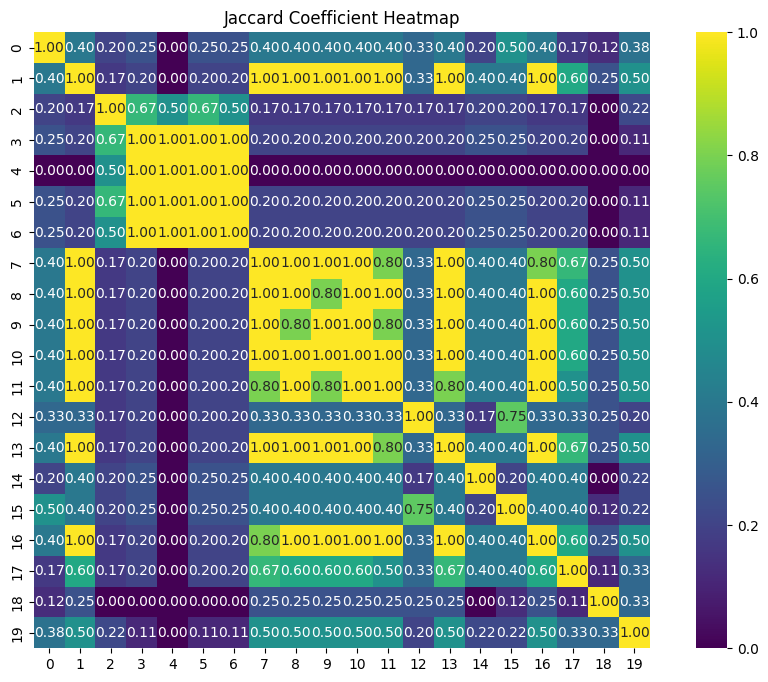

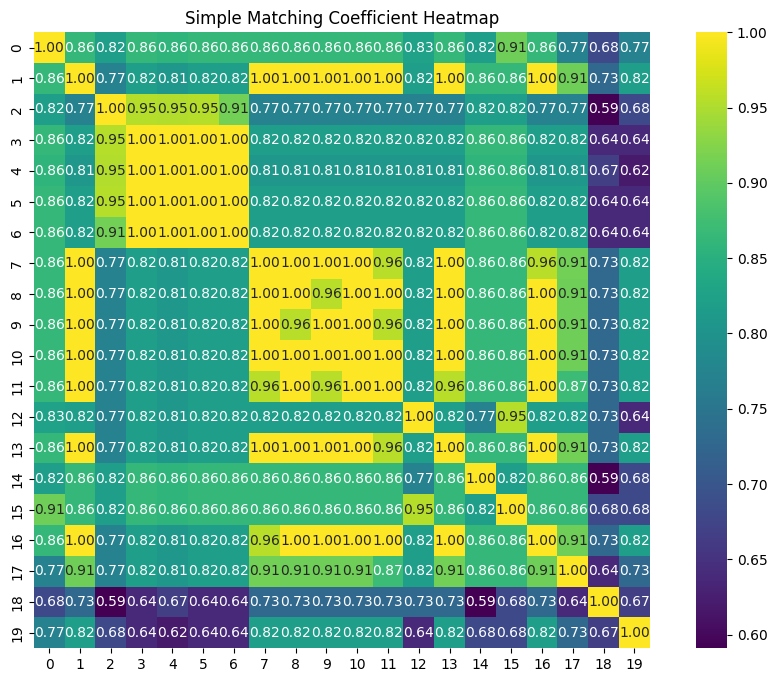

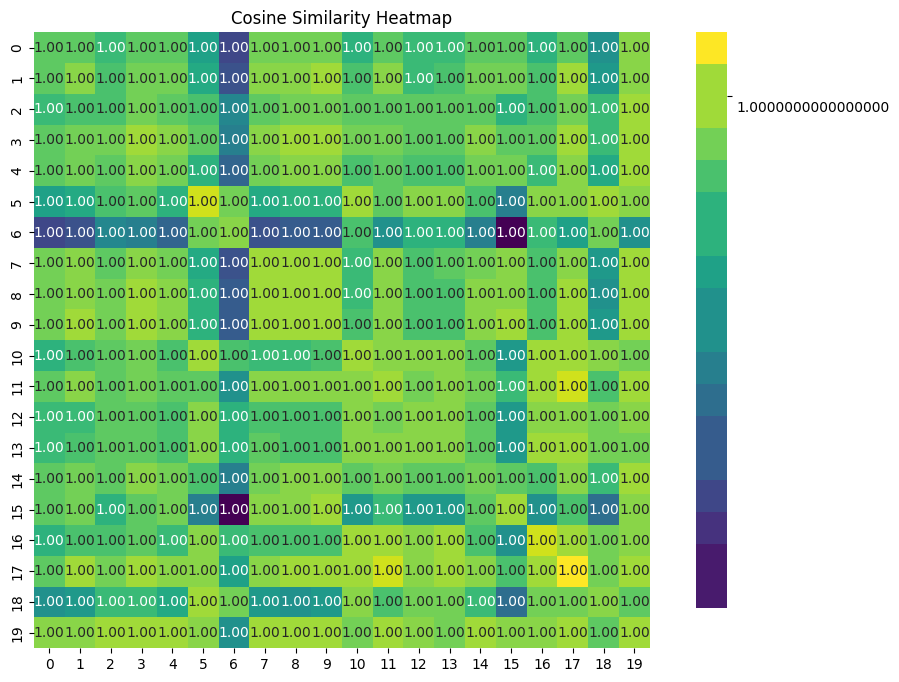

In [16]:
# Take the first 20 observations
data_20 = df.head(20)

# Convert categorical data to binary and handle missing values
data_20_binary = data_20.copy()
for col in data_20_binary.columns:
    if data_20_binary[col].dtype == 'object':
        encoder = LabelEncoder()
        data_20_binary[col] = data_20_binary[col].astype(str)
        data_20_binary[col] = encoder.fit_transform(data_20_binary[col])

data_20_binary.fillna(0, inplace=True)

# Function to calculate Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC)
def compute_similarity_matrix(data_binary, sim_type='JC'):
    num_rows = data_binary.shape[0]
    similarity_matrix = np.zeros((num_rows, num_rows))
    
    for i in range(num_rows):
        for j in range(i, num_rows):
            row1 = data_binary.iloc[i].values
            row2 = data_binary.iloc[j].values
            
            # Calculate frequencies
            f11 = np.sum((row1 == 1) & (row2 == 1))
            f00 = np.sum((row1 == 0) & (row2 == 0))
            f01 = np.sum((row1 == 0) & (row2 == 1))
            f10 = np.sum((row1 == 1) & (row2 == 0))
            
            # Calculate similarity
            if sim_type == 'JC':
                denom = (f01 + f10 + f11)
                similarity = f11 / denom if denom != 0 else np.nan
            elif sim_type == 'SMC':
                denom = (f00 + f01 + f10 + f11)
                similarity = (f11 + f00) / denom if denom != 0 else np.nan
            else:
                raise ValueError("Unsupported similarity type")
            
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric matrix
    
    return similarity_matrix

# Compute JC and SMC matrices
jc_matrix = compute_similarity_matrix(data_20_binary, sim_type='JC')
smc_matrix = compute_similarity_matrix(data_20_binary, sim_type='SMC')

# Function to compute Cosine Similarity matrix
def compute_cosine_similarity_matrix(data_binary):
    num_rows = data_binary.shape[0]
    cosine_matrix = np.zeros((num_rows, num_rows))
    
    for i in range(num_rows):
        for j in range(i, num_rows):
            vec1 = data_binary.iloc[i].values.reshape(1, -1)
            vec2 = data_binary.iloc[j].values.reshape(1, -1)
            cosine_sim = cosine_similarity(vec1, vec2)[0][0]
            cosine_matrix[i, j] = cosine_sim
            cosine_matrix[j, i] = cosine_sim  # Symmetric matrix
    
    return cosine_matrix

# Compute Cosine Similarity matrix
cosine_matrix = compute_cosine_similarity_matrix(data_20_binary)

# Plot Jaccard Coefficient heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(jc_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Jaccard Coefficient Heatmap')
plt.show()

# Plot Simple Matching Coefficient heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(smc_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Simple Matching Coefficient Heatmap')
plt.show()

# Plot Cosine Similarity heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cosine_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Cosine Similarity Heatmap')
plt.show()